In [1]:
import tensorflow as tf
import os

# Remove dodgy images from the dataset

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

* Run this folder to remove dodgy images from the dataset
* This is a one-time run
* This will remove images that are not in the dataset or are corrupted or are not in the right format

In [5]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    if not os.path.isdir(class_dir):
        continue  # Skip non-directory entries (e.g., files like .DS_Store)
    
    for image in os.listdir(class_dir):
        if image == ".DS_Store":
            continue  # Skip .DS_Store files
        
        image_path = os.path.join(class_dir, image)
        try: 
            img = cv2.imread(image_path)    
            tip = imghdr.what(image_path)   
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile


# Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# understand the keras function by adding ?? at the end

#tf.keras.utils.image_dataset_from_directory??

In [7]:
# using keras preprocessing pipeline to load and preprocess images 
data = tf.keras.utils.image_dataset_from_directory('data')

Found 512 files belonging to 2 classes.


In [8]:
# Create a data iterator and loop through it

data_iterator = data.as_numpy_iterator()
data_iterator

In [9]:
# create a batch of images and labels

batch = data_iterator.next()
batch

(array([[[[4.44880676e+00, 4.44880676e+00, 4.44880676e+00],
          [4.91868591e+00, 4.91868591e+00, 4.91868591e+00],
          [7.24023438e+00, 7.24023438e+00, 7.24023438e+00],
          ...,
          [4.35233307e+01, 4.85233307e+01, 4.25233307e+01],
          [3.44575500e+01, 3.94575500e+01, 3.34575500e+01],
          [1.93617401e+01, 2.43617401e+01, 1.83617401e+01]],
 
         [[4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
          [4.67362976e+00, 4.67362976e+00, 4.67362976e+00],
          [6.38281250e+00, 6.38281250e+00, 6.38281250e+00],
          ...,
          [3.66435699e+01, 4.16435699e+01, 3.56435699e+01],
          [3.48822174e+01, 3.98822174e+01, 3.38822174e+01],
          [2.51931610e+01, 3.01931610e+01, 2.41931610e+01]],
 
         [[4.71289062e+00, 4.71289062e+00, 4.71289062e+00],
          [6.01921082e+00, 6.01921082e+00, 6.01921082e+00],
          [7.53569031e+00, 7.53569031e+00, 7.53569031e+00],
          ...,
          [2.75625153e+01, 3.25625153e+01, 2.6562

In [10]:
len(batch)

2

In [11]:
print(f'Batch shape: {batch[0].shape}')

Batch shape: (32, 256, 256, 3)


In [12]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

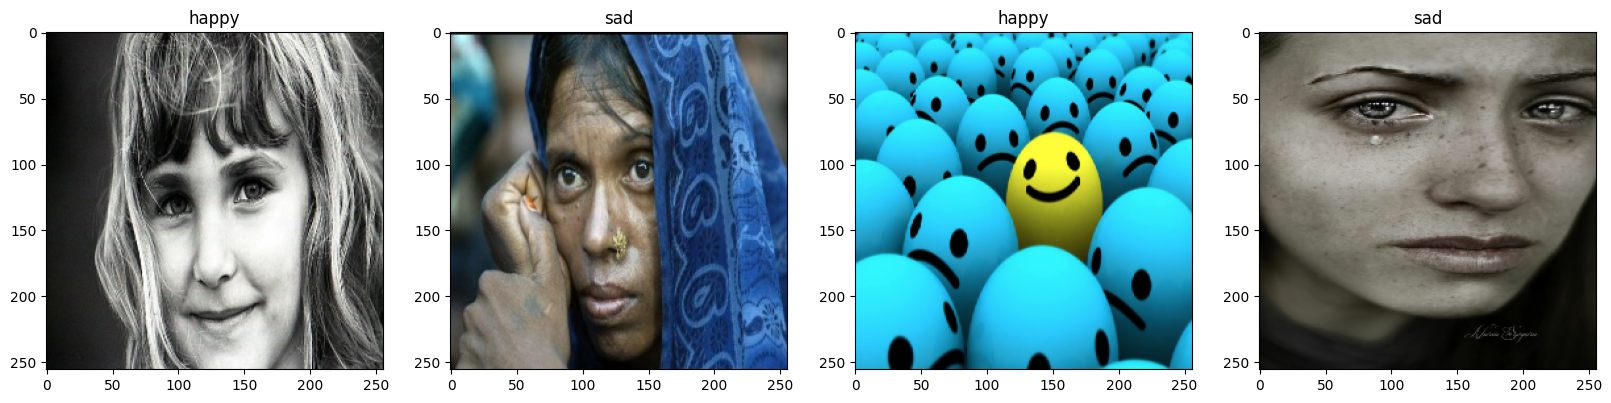

In [13]:
# Create a mapping from label index to label name
def map_label_to_name(label): # Create a mapping from label index to label name
    label_names = { 
        0: "happy", 
        1: "sad"
    }   
    return label_names.get(label, "unknown") 

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))   

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    label = batch[1][idx]
    label_name = map_label_to_name(label)
    #print(f"Label Index: {label}, Label Name: {label_name}")
    ax[idx].title.set_text(label_name)

# Preprocess Data


# Scale Data
    1. Prepossessing by scaling the images values to be between 0 and 1, this helps the model to learn faster and produce better results.
    2. Split the data into training and testing and validation partitions to avoid over-fitting.

In [14]:
# index 1 is the label and index 0 is the image
scaled = batch[0]
print(f'Min value:',scaled.min())
print(f'Max value:',scaled.max())
batch[0].shape # 32 images of 180x180 pixels with 3 channels (RGB)


Min value: 0.0
Max value: 255.0


(32, 256, 256, 3)

In [15]:
# Split the data into train and test sets
data = data.map(lambda x, y: (x/255, y)) # Scale the data

In [16]:
data.as_numpy_iterator().next()[0].min()

0.0

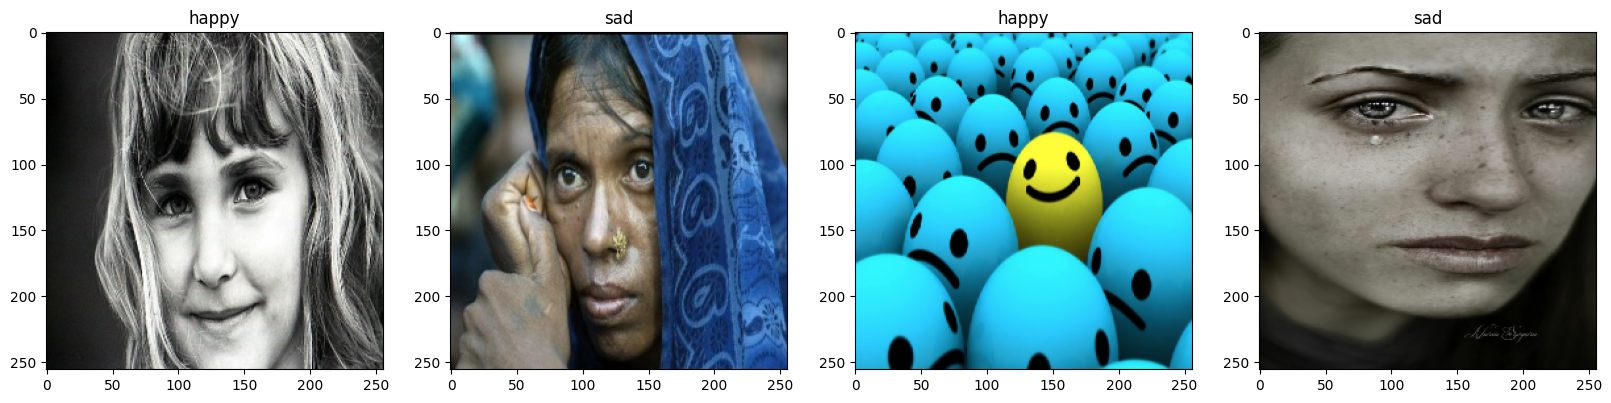

In [17]:
label_names = {0: "happy", 1: "sad"}

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))   

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    label = batch[1][idx]
    label_name = map_label_to_name(label)
    #print(f"Label Index: {label}, Label Name: {label_name}")
    ax[idx].title.set_text(label_names.get(label, "unknown"))


In [18]:
len(data)

16

In [19]:
# training data is 70% of the data and test data is 10% of the data and validation data is 20% of the data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)    
test_size = int(len(data)*.1)   

In [20]:
# show the number of images in each set
print(f'Train size: {train_size} == Validation size: {val_size} == Test size: {test_size}')

Train size: 11 == Validation size: 3 == Test size: 1


In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# show the number of images in each set
print(f'Train size: {len(train)}')
print(f'Validation size: {len(val)}')
print(f'Test size: {len(test)}')



Train size: 11
Validation size: 3
Test size: 1


# Deep Learning Model
    1. build a deep learning model using Keras
    2. Train the model using .fit method
    3. Plot The Performance

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [23]:
# create a model
model = Sequential()

In [24]:
# 16 filters, 3x3 kernel, stride 1
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))

# 32 filters, 3x3 kernel, stride 1
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

############


In [27]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Scale the data to between 0 and 1
    rotation_range=40, # Randomly rotate images between -40 and 40 degrees
    width_shift_range=0.2, # Randomly shift images horizontally between -20% and +20% of the image width
    height_shift_range=0.2, # Randomly shift images vertically between -20% and +20% of the image height
    shear_range=0.2, # Randomly shear images between -20% and +20% of the image width
    zoom_range=0.2, # Randomly zoom by 20%
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest' # Fill missing pixels with the nearest filled value
)

# Create a data generator for test data without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
    
# Create a data generator for validation data without data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)




# Train the Model
    1. Train the model using .fit method
    2. Plot The Performance

In [28]:
# create a log directory
log_dir = "logs"

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [42]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 3/11 [=======>......................] - ETA: 2s - loss: 1.0704 - accuracy: 0.4583

2023-08-27 21:37:21.424149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.7997 - accuracy: 0.5000

2023-08-27 21:37:25.485286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 574ms/step - loss: 0.7997 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.5833
Epoch 2/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.6752 - accuracy: 0.7188

2023-08-27 21:37:28.610818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.6676

2023-08-27 21:37:32.598643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 547ms/step - loss: 0.6636 - accuracy: 0.6676 - val_loss: 0.6252 - val_accuracy: 0.5625
Epoch 3/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.6061 - accuracy: 0.5833

2023-08-27 21:37:35.495554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.6619

2023-08-27 21:37:39.604277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 554ms/step - loss: 0.5924 - accuracy: 0.6619 - val_loss: 0.5358 - val_accuracy: 0.8021
Epoch 4/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7604

2023-08-27 21:37:42.589189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.5411 - accuracy: 0.7557

2023-08-27 21:37:46.493727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 540ms/step - loss: 0.5411 - accuracy: 0.7557 - val_loss: 0.5465 - val_accuracy: 0.7188
Epoch 5/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.4440 - accuracy: 0.7917

2023-08-27 21:37:49.397081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.4792 - accuracy: 0.7727

2023-08-27 21:37:53.368331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 537ms/step - loss: 0.4792 - accuracy: 0.7727 - val_loss: 0.4948 - val_accuracy: 0.7500
Epoch 6/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.4031 - accuracy: 0.8646

2023-08-27 21:37:56.262628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.8523

2023-08-27 21:38:00.246138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 538ms/step - loss: 0.3893 - accuracy: 0.8523 - val_loss: 0.3707 - val_accuracy: 0.8333
Epoch 7/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.2869 - accuracy: 0.8854

2023-08-27 21:38:03.136788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.3422 - accuracy: 0.8466

2023-08-27 21:38:07.101074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 541ms/step - loss: 0.3422 - accuracy: 0.8466 - val_loss: 0.2656 - val_accuracy: 0.9062
Epoch 8/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9167

2023-08-27 21:38:10.008399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.9233

2023-08-27 21:38:13.982559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 539ms/step - loss: 0.2435 - accuracy: 0.9233 - val_loss: 0.2456 - val_accuracy: 0.9167
Epoch 9/20
 3/11 [=======>......................] - ETA: 3s - loss: 0.1496 - accuracy: 0.9688

2023-08-27 21:38:16.853773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9489

2023-08-27 21:38:20.846806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 545ms/step - loss: 0.1729 - accuracy: 0.9489 - val_loss: 0.2050 - val_accuracy: 0.9271
Epoch 10/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.1573 - accuracy: 0.9688

2023-08-27 21:38:23.761709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1453 - accuracy: 0.9631

2023-08-27 21:38:27.726130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 542ms/step - loss: 0.1453 - accuracy: 0.9631 - val_loss: 0.1806 - val_accuracy: 0.9479
Epoch 11/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.1063 - accuracy: 0.9688

2023-08-27 21:38:30.683338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9716

2023-08-27 21:38:34.711256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 549ms/step - loss: 0.1141 - accuracy: 0.9716 - val_loss: 0.0693 - val_accuracy: 0.9896
Epoch 12/20
 3/11 [=======>......................] - ETA: 3s - loss: 0.0473 - accuracy: 1.0000

2023-08-27 21:38:37.638343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9801

2023-08-27 21:38:41.652550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 551ms/step - loss: 0.0764 - accuracy: 0.9801 - val_loss: 0.0620 - val_accuracy: 0.9896
Epoch 13/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.0470 - accuracy: 0.9896

2023-08-27 21:38:44.623368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9858

2023-08-27 21:38:48.620267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 543ms/step - loss: 0.0566 - accuracy: 0.9858 - val_loss: 0.1360 - val_accuracy: 0.9583
Epoch 14/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.0666 - accuracy: 0.9792

2023-08-27 21:38:51.515191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0769 - accuracy: 0.9801

2023-08-27 21:38:55.505930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 547ms/step - loss: 0.0769 - accuracy: 0.9801 - val_loss: 0.0828 - val_accuracy: 0.9792
Epoch 15/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.0512 - accuracy: 0.9896

2023-08-27 21:38:58.399286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9972

2023-08-27 21:39:02.427432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 542ms/step - loss: 0.0428 - accuracy: 0.9972 - val_loss: 0.0456 - val_accuracy: 0.9792
Epoch 16/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.0393 - accuracy: 0.9896

2023-08-27 21:39:05.328033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9943

2023-08-27 21:39:09.305652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 544ms/step - loss: 0.0251 - accuracy: 0.9943 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 17/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.0082 - accuracy: 1.0000

2023-08-27 21:39:12.278151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9943

2023-08-27 21:39:16.225179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 543ms/step - loss: 0.0322 - accuracy: 0.9943 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 18/20
 3/11 [=======>......................] - ETA: 2s - loss: 0.0275 - accuracy: 0.9896

2023-08-27 21:39:19.124966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9943

2023-08-27 21:39:23.349687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 574ms/step - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 19/20
 3/11 [=======>......................] - ETA: 3s - loss: 0.0137 - accuracy: 1.0000

2023-08-27 21:39:26.539370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000

2023-08-27 21:39:30.502081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 567ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 20/20
 3/11 [=======>......................] - ETA: 3s - loss: 0.0038 - accuracy: 1.0000

2023-08-27 21:39:33.582015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9972

2023-08-27 21:39:37.671098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 562ms/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.0077 - val_accuracy: 1.0000


In [43]:
history.history

{'loss': [0.7997217774391174,
  0.6636413335800171,
  0.5924034118652344,
  0.5410507917404175,
  0.4792483448982239,
  0.3892885446548462,
  0.3422151803970337,
  0.2435387670993805,
  0.17290887236595154,
  0.14530766010284424,
  0.11408904194831848,
  0.07635468244552612,
  0.05663716420531273,
  0.07689711451530457,
  0.0428045429289341,
  0.025085149332880974,
  0.03223926201462746,
  0.02539663203060627,
  0.010550863109529018,
  0.01158260926604271],
 'accuracy': [0.5,
  0.6676136255264282,
  0.6619318127632141,
  0.7556818127632141,
  0.7727272510528564,
  0.8522727489471436,
  0.8465909361839294,
  0.9232954382896423,
  0.9488636255264282,
  0.9630681872367859,
  0.9715909361839294,
  0.9801136255264282,
  0.9857954382896423,
  0.9801136255264282,
  0.9971590638160706,
  0.9943181872367859,
  0.9943181872367859,
  0.9943181872367859,
  1.0,
  0.9971590638160706],
 'val_loss': [0.6884065270423889,
  0.6252055764198303,
  0.5358279347419739,
  0.5465164184570312,
  0.49480548501

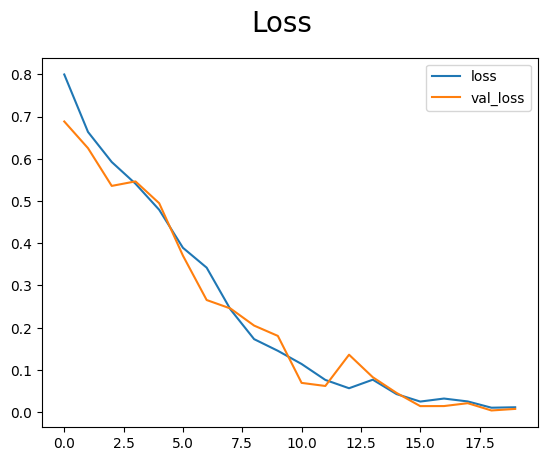

In [44]:
# plot the accuracy and loss

fig = plt.figure()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()



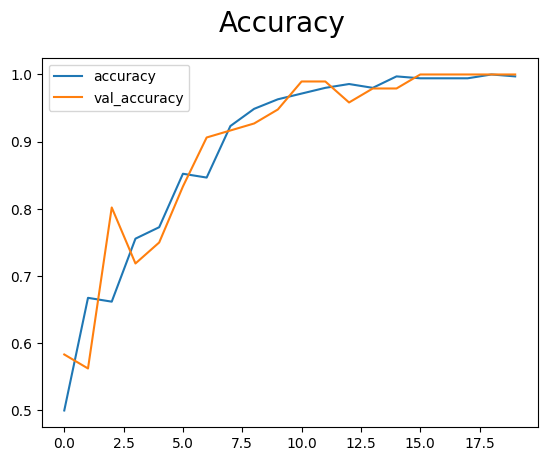

In [45]:
# plot the accuracy and val_accuracy

fig = plt.figure()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate the Model
    1. Evaluate the model
    2. 

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    images, labels = batch
    predictions = model.predict(images)
    pre.update_state(labels, predictions)
    rec.update_state(labels, predictions)
    acc.update_state(labels, predictions)

2023-08-27 21:40:01.396678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 79ms/step


In [49]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


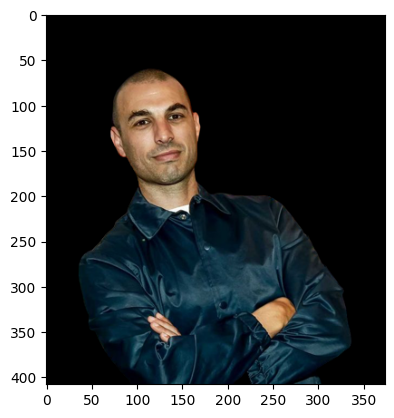

In [50]:
img = cv2.imread('data_untrained/happy/sobhi_Malak.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

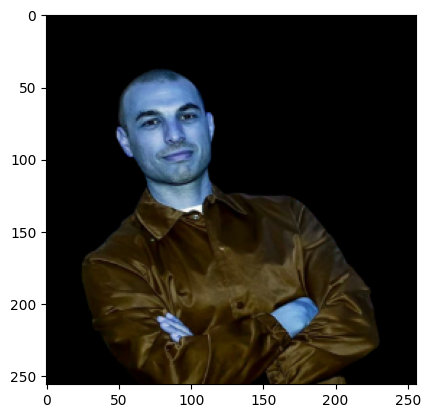

In [51]:
# resize the image to 256x256
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
# add a batch dimension
img = np.expand_dims(img, axis=0).shape
img

(1, 408, 374, 3)

In [53]:
yhat = model.predict(np.expand_dims(resize, axis=0))


1/1 [==============================] - 0s 22ms/step


In [54]:
yhat

array([[0.]], dtype=float32)

In [55]:
# if yhat is greater than 0.5 then the image is sad else the image is happy
if yhat > 0.5:
    print('sad')
else:
    print('happy')

happy
